In [1]:
import dataloader
import random
import numpy as np
import os
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.autograd import Variable
#from sklearn.model_selection import train_test_split
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import glob
import matplotlib.pyplot as plt
from dataloader import Dataload

In [5]:


batch_size = 1

train_dataloader = Dataload(r"E:\Dataset\training_set\train", dataset_type = "train",same_matrix=False)
train_loader= DataLoader(
    dataset = train_dataloader,
    batch_size = batch_size,
    shuffle = False,
    drop_last = True
)


E:\Dataset\training_set\train\images\ E:\Dataset\training_set\train\labels\
total: 537


In [23]:
y

[True, True, True, True, True, True, True, True]

In [24]:
x = [float(i) for i in range(8)]
y= [False for i in range(8)]
pos = []
i =-1
for data in train_loader:
    i +=1
    img,label = data
    # print(label[0][0])
    if(label[0][0] in x and y[int(label[0][0])] == False ):
        pos.append(i)

        y[int(label[0][0])] =True
        print(label[0][0])
        # plt.imshow(num_img)

tensor([0.], dtype=torch.float64)
tensor([4.], dtype=torch.float64)
tensor([1.], dtype=torch.float64)
tensor([7.], dtype=torch.float64)
tensor([5.], dtype=torch.float64)
tensor([6.], dtype=torch.float64)
tensor([3.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)


In [32]:
pos

[0, 12, 117, 222, 223, 232, 327, 432]

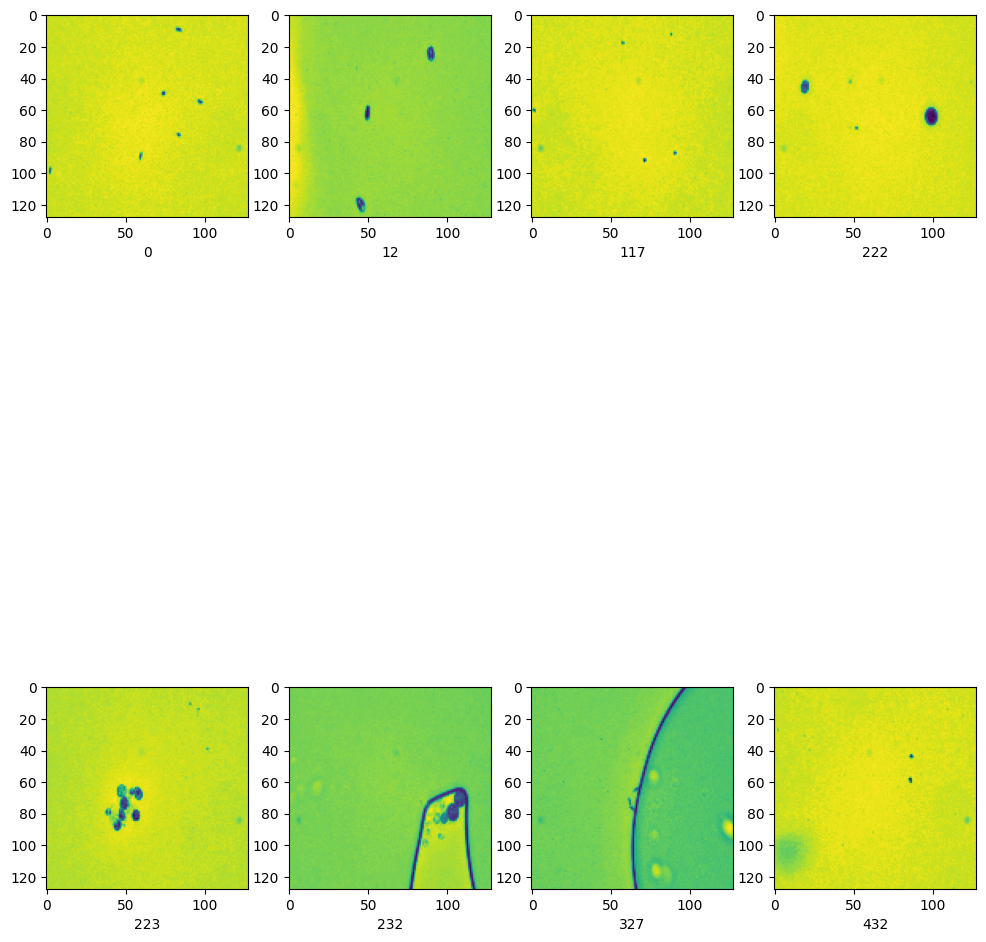

In [62]:
photo = []
photo_label = []
for i in pos:
    num_img, label = train_dataloader[i]
    num_img = np.array(num_img)
    num_img = num_img.swapaxes(0, 1)
    num_img = num_img.swapaxes(1, 2)
    photo.append(num_img)
    photo_label.append(label)
plt.figure(figsize=(12,16))
for i in range(len(pos)):
    index = pos[i]
    plt.subplot(int("24{}".format(i+1)))
    plt.imshow(photo[i][:,:,0])
    plt.xlabel(index)
    #plt.title(photo_label[i])
#
#
# plt.subplot(242)
# plt.imshow(photo[1])
# plt.title(i)
#
#
# plt.subplot(243)
# plt.imshow(photo[2])
# plt.title(i)
#
#
# plt.subplot(244)
# plt.imshow(photo[3])
# plt.title(i)
#
#
# plt.subplot(245)
# plt.imshow(photo[4])
# plt.title(i)
#
#
# plt.subplot(246)
# plt.imshow(photo[5])
# plt.title(i)
#
#
# plt.subplot(247)
# plt.imshow(photo[6])
# plt.title(i)
#
# plt.figure(figsize=(12,12))
# plt.subplot(248)
# plt.imshow(photo[7])
# plt.title(i)


In [60]:
photo[-2]

array([[[0.42374527, 0.46787342, 0.5716906 ],
        [0.42374527, 0.5000854 , 0.6016734 ],
        [0.43962   , 0.4839794 , 0.586682  ],
        ...,
        [0.5348683 , 0.59672135, 0.6616391 ],
        [0.51899356, 0.5484034 , 0.6616391 ],
        [0.51899356, 0.58061534, 0.6616391 ]],

       [[0.47136942, 0.5161914 , 0.6166648 ],
        [0.43962   , 0.46787342, 0.586682  ],
        [0.39199582, 0.5000854 , 0.6016734 ],
        ...,
        [0.51899356, 0.5645094 , 0.6616391 ],
        [0.5348683 , 0.58061534, 0.6766305 ],
        [0.51899356, 0.5645094 , 0.6616391 ]],

       [[0.4554947 , 0.5000854 , 0.5716906 ],
        [0.43962   , 0.4839794 , 0.586682  ],
        [0.42374527, 0.5161914 , 0.6166648 ],
        ...,
        [0.5031189 , 0.5484034 , 0.64664763],
        [0.5348683 , 0.58061534, 0.6766305 ],
        [0.550743  , 0.5484034 , 0.6016734 ]],

       ...,

       [[0.43962   , 0.5161914 , 0.6166648 ],
        [0.40787056, 0.4839794 , 0.5566992 ],
        [0.42374527, 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


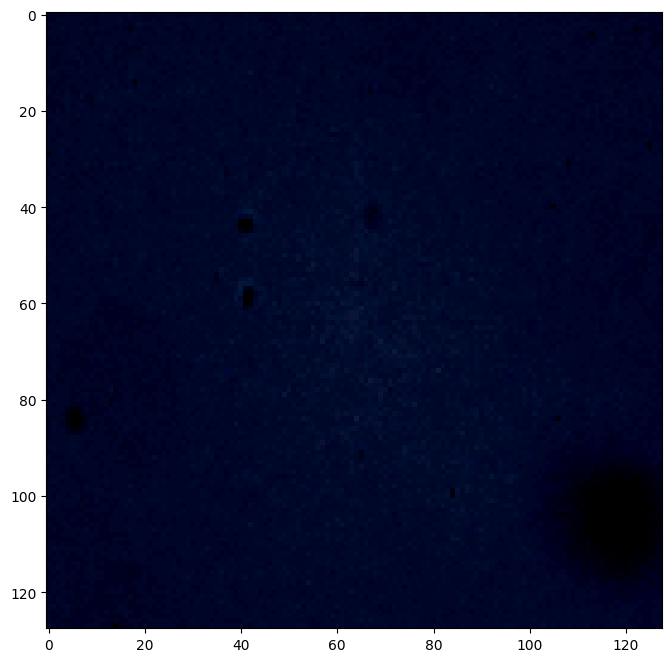

In [61]:
plt.figure(figsize=(8,8))
plt.imshow(photo[-1])

In [ ]:
import os
import glob
file_path =r'E:\Dataset\training_set\train\labels'
file = glob.glob(file_path+'/*.txt')
# print(file)
maxNum = 0

for i in file:
    label = []
    with open(i) as f:
        lines = f.readlines()
        for line in lines:
            x = line.replace('\n', '').split(' ')
            x = [float(i) for i in x]
            label.append(x)
    if(len(label)>maxNum):
        maxNum = len(label)
        print(i)